**Data Import and description**

In [36]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    with open('data/processed/quality_report_mqa.json', 'r') as f:
        data = json.load(f)
    df = pd.json_normalize(data)
    df.columns = df.columns.str.replace(r"^scores_by_dimension.", "", regex=True)
except FileNotFoundError:
    st.error("Error: The 'report.json' file was not found. Please make sure it's in the same directory.")
    st.stop()


**Vizual analysis of quality scores**

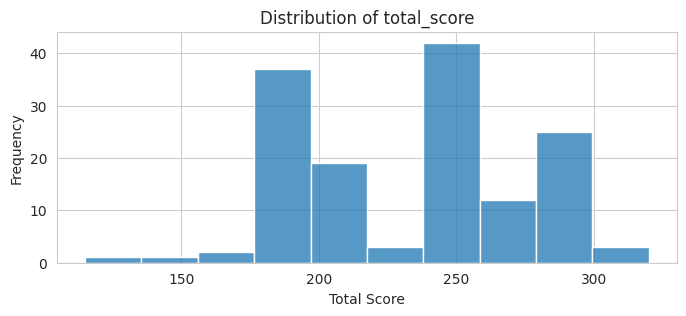

In [37]:
# Set plot style
sns.set_style("whitegrid")
# Plot distribution of total scores
plt.figure(figsize=(8, 3))
sns.histplot(df['total_score'], kde=False, bins=10)
plt.title('Distribution of total_score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()


It seems that the distribution of scores is quite uneven. It's almost like we have three quality "classes". Let's check out the overall quality ratings next. 

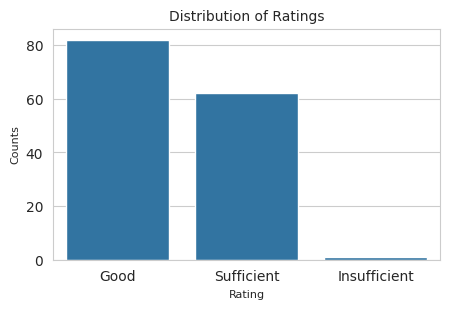

In [38]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings', size=10)
plt.xlabel('Rating', size=8)
plt.ylabel('Counts', size=8)
plt.show()

Ok most of them are good or sufficient. Let's investigate which dimensions are actually problematic and which ones are generally good.

In [39]:
# Select the dimension score columns from the original DataFrame
dimension_scores = df[['findability', 'reusability', 'accessibility', 
    'interoperability', 'context']]



# Melt df into long format
df_long = pd.melt(dimension_scores, var_name='dimension', value_name='score')

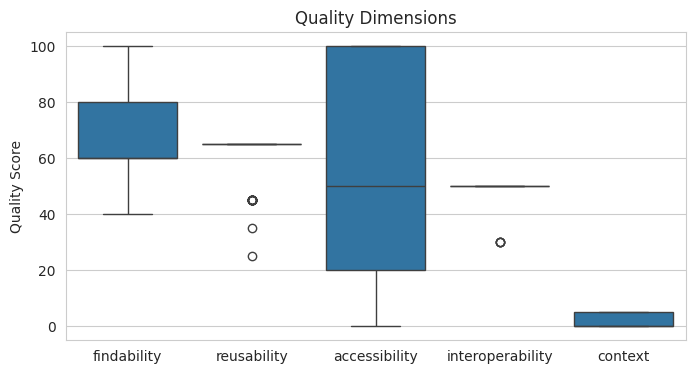

In [40]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_long, x='dimension', y='score')
plt.title('Quality Dimensions')
plt.xlabel('')
plt.ylabel('Quality Score')
plt.show()

There's a big issue with accessibility and it seems that a lot of links are not reachable. 

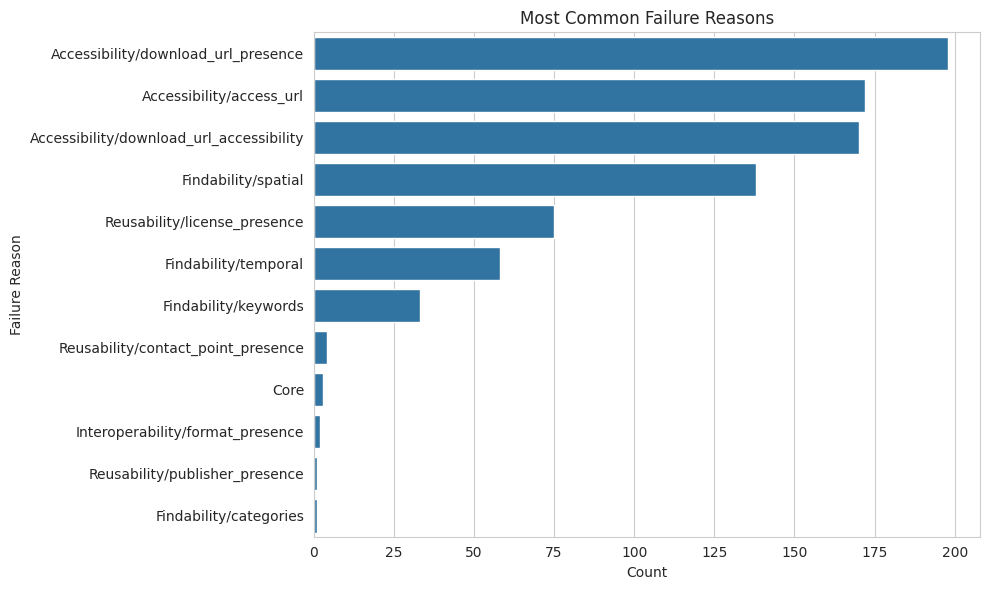

In [48]:
from collections import Counter
# Extract and count all failure reasons
failures = []
for details_list in df['details']:
    for detail in details_list:
        if detail.startswith("FAIL"):
            # keep the core reason and description for clarity
            failures.append(detail.split(' - ')[0])

failure_counts = Counter(failures)
failure_df = pd.DataFrame(failure_counts.items(), columns=['failure_reason', 'count']).sort_values('count', ascending=False)
failure_df['failure_reason'] = failure_df['failure_reason'].str.replace('FAIL: ', '', regex=True)
# Plot the most common failure reasons
plt.figure(figsize=(10, 6))
failure_plot = sns.barplot(x='count', y='failure_reason', data=failure_df, orient='h')
plt.title('Most Common Failure Reasons')
plt.xlabel('Count')
plt.ylabel('Failure Reason')
plt.tight_layout()
plt.show()